In [ ]:
import os
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50
import time
from torch.autograd import Variable
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from keras.preprocessing import image
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path='/content/drive/MyDrive/Colab Notebooks/CV1/project'

In [ ]:
os.listdir(data_path)

['list_attribute.csv',
 'class_identity.txt',
 'gender_classification.csv',
 'Images',
 'list_attribute_.txt',
 'list_attribute.txt',
 'train',
 'test']

In [ ]:
images_list = os.listdir(data_path+'/Images')
#images_list

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV1/project/list_attribute.csv')
df.replace(to_replace = -1, value = 0,inplace = True )
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
new_df = df[df['image_id'].isin(images_list)]
new_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
50,000051.jpg,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51,000052.jpg,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
64,000065.jpg,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
165,000166.jpg,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
197,000198.jpg,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202319,202320.jpg,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
202339,202340.jpg,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,1
202346,202347.jpg,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
202356,202357.jpg,0,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,1,1,0,1


In [ ]:
data = new_df[['image_id','Male']]
#data.set_index('image_id', inplace = True)
data.head()

,image_id,Male
50,000051.jpg,1
51,000052.jpg,1
64,000065.jpg,1
165,000166.jpg,1
197,000198.jpg,0


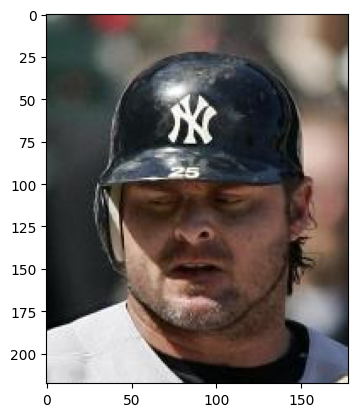

,image_id,Male
165,000166.jpg,1


In [ ]:
picture = '/content/drive/MyDrive/Colab Notebooks/CV1/project/Images/000166.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
filename = os.path.basename(picture)
data[data['image_id'] == filename][['image_id', 'Male']]
#data.loc[picture.split('/')[-1]].split('/')[-1]][['Male']]

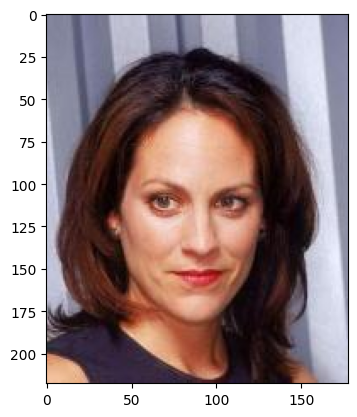

,image_id,Male
197,000198.jpg,0


In [ ]:
picture = '/content/drive/MyDrive/Colab Notebooks/CV1/project/Images/000198.jpg'
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/CV1/project/Images/000198.jpg')
imgplot = plt.imshow(img)
plt.show()
filename = os.path.basename(picture)
data[data['image_id'] == filename][['image_id', 'Male']]

In [ ]:
# Split the DataFrame
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Directory containing image files
image_directory = '/content/drive/MyDrive/Colab Notebooks/CV1/project/Images'

# Directories to store the train and test images
train_image_dir = '/content/drive/MyDrive/Colab Notebooks/CV1/project/train'
test_image_dir = '/content/drive/MyDrive/Colab Notebooks/CV1/project/test'



In [ ]:
# Iterate through the image files and move them to the appropriate subfolders
#for image_id, male in zip(train_data['image_id'], train_data['Male']):
#    source_path = os.path.join(image_directory, image_id)
#    target_dir = os.path.join(train_image_dir, str(male))
#    os.makedirs(target_dir, exist_ok=True)  # Create subfolder if it doesn't exist
#    target_path = os.path.join(target_dir, image_id)
#    shutil.copy(source_path, target_path)

#for image_id, male in zip(test_data['image_id'], test_data['Male']):
#    source_path = os.path.join(image_directory, image_id)
#    target_dir = os.path.join(test_image_dir, str(male))
#    os.makedirs(target_dir, exist_ok=True)  # Create subfolder if it doesn't exist
#    target_path = os.path.join(target_dir, image_id)
#    shutil.copy(source_path, target_path)

In [ ]:
test_data.head()

,image_id,Male
60964,060965.jpg,1
103729,103730.jpg,1
107305,107306.jpg,1
42409,042410.jpg,1
28519,028520.jpg,1


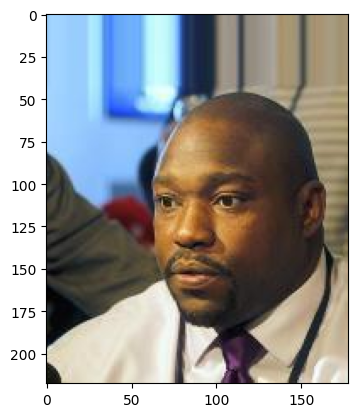

In [ ]:
picture2 = '/content/drive/MyDrive/Colab Notebooks/CV1/project/test/1/028520.jpg'
img2 = mpimg.imread(picture2)
imgplot2 = plt.imshow(img2)
plt.show()

In [ ]:
train_data.head()

,image_id,Male
171264,171265.jpg,1
189512,189513.jpg,1
32355,032356.jpg,0
148049,148050.jpg,0
170129,170130.jpg,0


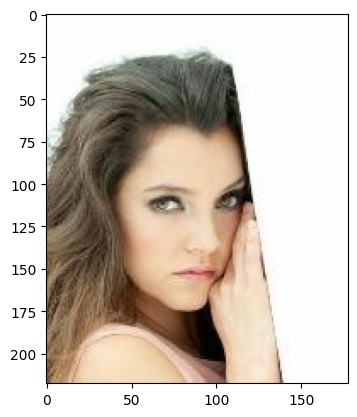

In [ ]:
picture2 = '/content/drive/MyDrive/Colab Notebooks/CV1/project/train/0/148050.jpg'
img2 = mpimg.imread(picture2)
imgplot2 = plt.imshow(img2)
plt.show()

In [ ]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [ ]:
#create trainining generator
train_generator = ImageDataGenerator(rescale=1./255,
                                     #horizontal_flip=True,
                                     #vertical_flip=True,
                                     #width_shift_range = 0.3,
                                     #height_shift_range = 0.3,
                                     #fill_mode='nearest'
                                     preprocessing_function=add_noise,
                                     brightness_range=[0.5, 1.5],
                                     rotation_range=25,
                                     zoom_range=0.3,
                                     shear_range=0.3
                                     )

In [ ]:
#create training data generator
train_data = train_generator.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CV1/project/train',
                                                 target_size=(250, 250),
                                                 batch_size=48,
                                                 class_mode='binary')

Found 4000 images belonging to 2 classes.


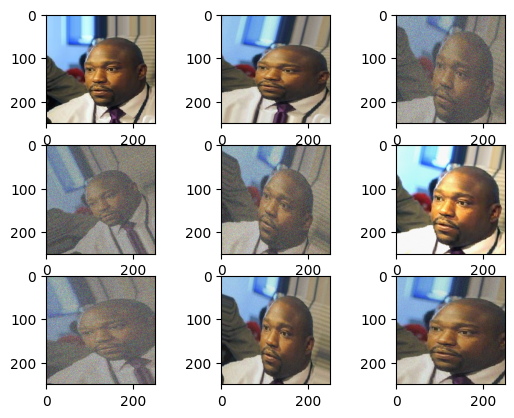

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/CV1/project/test/1/028520.jpg'
img = image.load_img(img_path, target_size=(250,250))

# Generate distorted images
images = [img]
img_arr = image.img_to_array(img)
img_arr = img_arr.reshape((1,) + img_arr.shape)
for batch in train_generator.flow(img_arr, batch_size=1):
    images.append( image.array_to_img(batch[0]) )
    if len(images) >= 9:
        break

# Display
import matplotlib.pyplot as plt
f, xyarr = plt.subplots(3,3)
xyarr[0,0].imshow(images[0])
xyarr[0,1].imshow(images[1])
xyarr[0,2].imshow(images[2])
xyarr[1,0].imshow(images[3])
xyarr[1,1].imshow(images[4])
xyarr[1,2].imshow(images[5])
xyarr[2,0].imshow(images[6])
xyarr[2,1].imshow(images[7])
xyarr[2,2].imshow(images[8])
plt.show()

In [ ]:
#create data validation
val_generator = ImageDataGenerator(rescale=1./255)

val_data = val_generator.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CV1/project/test',
                                             target_size=(250, 250),
                                             class_mode='binary',
                                             batch_size=128)

Found 1000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
#tf.keras.backend.clear_session()

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 64)        0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history=model.fit(train_data,
                  #steps_per_epoch=70,
                  steps_per_epoch=len(train_data),
                  epochs=30,
                  validation_data=val_data,
                  validation_steps=len(val_data))
                  #validation_steps=50)

Epoch 1/30
84/84 [==============================] - 1199s 14s/step - loss: 0.6914 - acc: 0.5828 - val_loss: 0.6812 - val_acc: 0.5960
Epoch 2/30
84/84 [==============================] - 109s 1s/step - loss: 0.6588 - acc: 0.6143 - val_loss: 0.6035 - val_acc: 0.6360
Epoch 3/30
84/84 [==============================] - 110s 1s/step - loss: 0.6030 - acc: 0.6752 - val_loss: 0.5505 - val_acc: 0.7370
Epoch 4/30
84/84 [==============================] - 107s 1s/step - loss: 0.5614 - acc: 0.7145 - val_loss: 0.5587 - val_acc: 0.7440
Epoch 5/30
84/84 [==============================] - 111s 1s/step - loss: 0.5401 - acc: 0.7355 - val_loss: 0.4586 - val_acc: 0.8020
Epoch 6/30
84/84 [==============================] - 109s 1s/step - loss: 0.4934 - acc: 0.7730 - val_loss: 0.4407 - val_acc: 0.7940
Epoch 7/30
84/84 [==============================] - 108s 1s/step - loss: 0.4435 - acc: 0.8010 - val_loss: 0.3897 - val_acc: 0.8340
Epoch 8/30
84/84 [==============================] - 108s 1s/step - loss: 0.4106 -

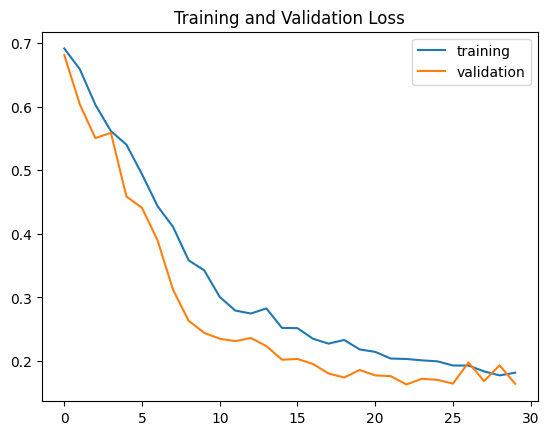

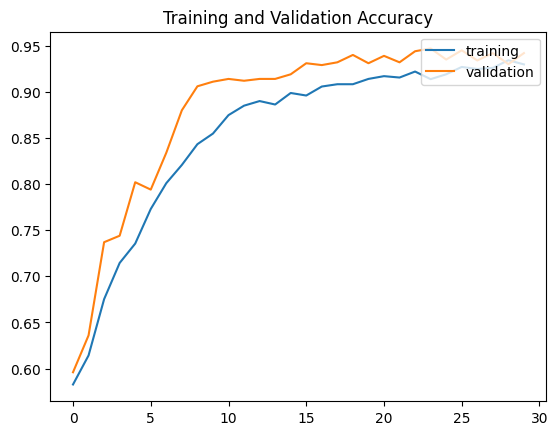

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.legend(['training','validation'], loc='upper right')
plt.show()


In [ ]:
#num_of_test_samples = 250
from sklearn.metrics import classification_report, confusion_matrix

model = model
val_data = val_generator.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CV1/project/test',
                                                              batch_size=48,
                                                              class_mode='binary',
                                                              target_size=(250, 250),
                                                              shuffle = False)

#filenames = val_data.filenames
#nb_samples = len(filenames)

y_true = val_data.classes
Y_pred = model.predict(val_data)
y_pred = np.where(Y_pred>0.5, 1, 0)

print('Confusion Matrix')
print('Classification Report')
target_names = ['0', '1']
print(classification_report(y_true, y_pred, target_names=target_names))


Found 1000 images belonging to 2 classes.
21/21 [==============================] - 4s 194ms/step
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       596
           1       0.91      0.95      0.93       404

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

